# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather"

In [4]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []

set = 1

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    
    # Build partial query URL
    query_url = f"{url}?q={city}&units=imperial&appid={weather_api_key}"
    response = requests.get(query_url).json()
    
    
    try:
        
        
        city_name.append(response['name'])
        
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        humidity.append(response['main']['humidity'])

        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])

        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
    
        print (f"Processing Record {cities.index(city)+1} of Set {set} | {city}")
        
    
    except:
        print("City not found. Skipping...")
        set = set + 1
        pass
    
print("""
-----------------------------
Data Retrieval Complete      
-----------------------------
""")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | mitchell
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | hamilton
Processing Record 4 of Set 1 | inuvik
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | witu
Processing Record 8 of Set 1 | bethel
City not found. Skipping...
Processing Record 10 of Set 2 | cidreira
Processing Record 11 of Set 2 | husavik
Processing Record 12 of Set 2 | avarua
City not found. Skipping...
Processing Record 14 of Set 3 | punta arenas
Processing Record 15 of Set 3 | helong
Processing Record 16 of Set 3 | hithadhoo
City not found. Skipping...
Processing Record 18 of Set 4 | vaini
City not found. Skipping...
Processing Record 20 of Set 5 | poum
Processing Record 21 of Set 5 | albany
City not found. Skipping...
Processing Record 23 of Set 6 | east london
Processing Record 24 of Set 6 | richards bay
Processing Record 25 of Set 6 | new norfolk

Processing Record 199 of Set 20 | tiarei
Processing Record 200 of Set 20 | pirovskoye
Processing Record 201 of Set 20 | mexico
Processing Record 202 of Set 20 | bambous virieux
Processing Record 203 of Set 20 | solnechnyy
Processing Record 204 of Set 20 | kavieng
Processing Record 205 of Set 20 | lebu
Processing Record 206 of Set 20 | saint-georges
Processing Record 207 of Set 20 | aswan
Processing Record 208 of Set 20 | nanortalik
Processing Record 209 of Set 20 | faya
Processing Record 210 of Set 20 | vestmannaeyjar
Processing Record 211 of Set 20 | xai-xai
City not found. Skipping...
Processing Record 213 of Set 21 | emerald
City not found. Skipping...
Processing Record 215 of Set 22 | road town
Processing Record 216 of Set 22 | saint george
City not found. Skipping...
Processing Record 218 of Set 23 | camopi
Processing Record 219 of Set 23 | riviere-au-renard
Processing Record 220 of Set 23 | narsaq
Processing Record 221 of Set 23 | akyab
City not found. Skipping...
Processing Reco

Processing Record 395 of Set 39 | mount gambier
Processing Record 396 of Set 39 | guerrero negro
Processing Record 397 of Set 39 | teya
City not found. Skipping...
Processing Record 399 of Set 40 | warkworth
Processing Record 400 of Set 40 | boden
Processing Record 401 of Set 40 | dandong
Processing Record 402 of Set 40 | parli
Processing Record 403 of Set 40 | sibolga
Processing Record 404 of Set 40 | pinheiro
Processing Record 405 of Set 40 | pervomayskiy
Processing Record 406 of Set 40 | palmer
Processing Record 407 of Set 40 | orlando
Processing Record 408 of Set 40 | ketchikan
Processing Record 409 of Set 40 | lazaro cardenas
Processing Record 410 of Set 40 | kudahuvadhoo
Processing Record 411 of Set 40 | mehamn
Processing Record 412 of Set 40 | santiago del estero
Processing Record 413 of Set 40 | bilma
Processing Record 414 of Set 40 | carballo
Processing Record 415 of Set 40 | northam
Processing Record 416 of Set 40 | kendari
Processing Record 417 of Set 40 | lompoc
Processing 

Processing Record 590 of Set 56 | dingle
Processing Record 591 of Set 56 | palmas
Processing Record 592 of Set 56 | aksarka
Processing Record 593 of Set 56 | port macquarie
Processing Record 594 of Set 56 | krasnoselkup
City not found. Skipping...
Processing Record 596 of Set 57 | itoman
Processing Record 597 of Set 57 | sale
Processing Record 598 of Set 57 | makakilo city
Processing Record 599 of Set 57 | nihommatsu
Processing Record 600 of Set 57 | tanout
Processing Record 601 of Set 57 | necochea
Processing Record 602 of Set 57 | kununurra
Processing Record 603 of Set 57 | karasuk
Processing Record 604 of Set 57 | evanston
Processing Record 605 of Set 57 | ban nahin
Processing Record 606 of Set 57 | prince rupert
City not found. Skipping...
Processing Record 608 of Set 58 | biskamzha
Processing Record 609 of Set 58 | bima
Processing Record 610 of Set 58 | kozienice
City not found. Skipping...
Processing Record 612 of Set 59 | racovita
Processing Record 613 of Set 59 | neuquen
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "City": city_name,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat,
    "Lon" : lon,
    "Max Temp" : max_temp,
    "Wind Speed" : wind_speed    
}

weather_data = pd.DataFrame(weather_dict)

weather_data.to_csv("cities.csv", index=True, header=True)

weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Mitchell,1,US,1582157130,55,43.71,-98.03,10.40,11.41
1,Jamestown,75,US,1582156975,73,42.10,-79.24,26.01,9.17
2,Hamilton,1,US,1582157224,55,39.18,-84.53,39.20,3.36
3,Inuvik,90,CA,1582157225,85,68.35,-133.72,17.60,10.29
4,Iqaluit,20,CA,1582157008,59,63.75,-68.51,-31.00,3.36
...,...,...,...,...,...,...,...,...,...
558,Bilibino,100,RU,1582157419,94,68.05,166.44,-22.92,2.68
559,Vostok,100,RU,1582157419,92,46.49,135.88,7.20,9.10
560,Wenchi,61,GH,1582157419,62,7.74,-2.10,78.30,5.26
561,Pozo Colorado,93,PY,1582157420,72,-23.49,-58.80,82.60,2.46


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. TMax Temperature Plot

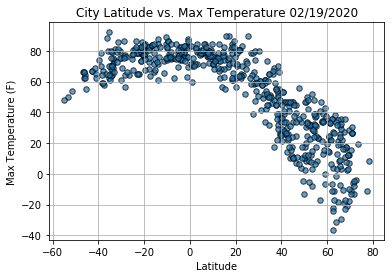

In [6]:
plt.figure(1)

ax = plt.gca()

weather_data.plot(kind='scatter', x='Lat', y='Max Temp', alpha=0.7, edgecolors='Black', s = 30, ax=ax)

plt.title('City Latitude vs. Max Temperature 02/19/2020')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

# Save the Figure
plt.savefig("images/Fig1.png")

# Show the Figure
plt.show()

The data points appear to be tight indicating a high correlation between our variables - latitude and maximum temperature.

#### Latitude vs. Humidity Plot

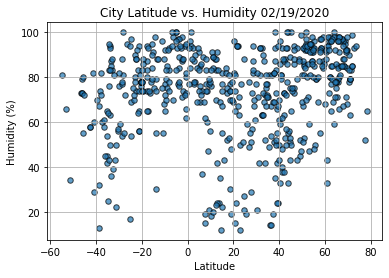

In [7]:
plt.figure(2)

ax = plt.gca()

weather_data.plot(kind='scatter', x='Lat', y='Humidity', alpha=0.7, edgecolors='Black', s = 30, ax=ax)

plt.title('City Latitude vs. Humidity 02/19/2020')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the Figure
plt.savefig("images/Fig2.png")

# Show the Figure
plt.show()

The plot tells us that the randomly selected sample data show no correlation for our variables humidity and latitude because of how the graph is not linear and data points are scattered. While generally speaking, we know this is false, we have to keep in mind that this is based off a selected very small sample data.

#### Latitude vs. Cloudiness Plot

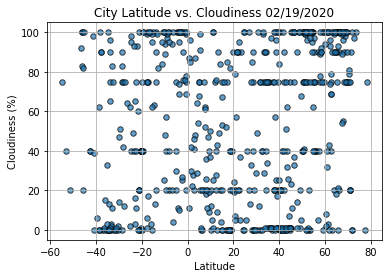

In [8]:
plt.figure(3)

ax = plt.gca()

weather_data.plot(kind='scatter', x='Lat', y='Cloudiness', alpha=0.7, edgecolors='Black', s = 30, ax=ax)

plt.title('City Latitude vs. Cloudiness 02/19/2020')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the Figure
plt.savefig("images/Fig3.png")

# Show the Figure
plt.show()

This graph tells us that there is no correlation between the variables latitude and cloudiness. There doesn't seem to be a pattern on how the data points lie and does not seem to go in any particular direction either.

#### Latitude vs. Wind Speed Plot

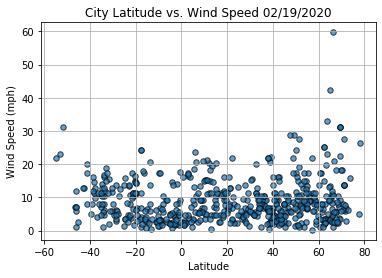

In [9]:
plt.figure(4)

ax = plt.gca()

weather_data.plot(kind='scatter', x='Lat', y='Wind Speed', alpha=0.7, edgecolors='Black', s = 30, ax=ax)

plt.title('City Latitude vs. Wind Speed 02/19/2020')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

# Save the Figure
plt.savefig("images/Fig4.png")

# Show the Figure
plt.show()

This scatter plot tells us that wind is not affected by the latitude. The data points are tight and shows a pretty consistent value with few outliers through different latitudes.

## Linear Regression

In [10]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_data = weather_data[weather_data['Lat'] >= 0]
southern_hemisphere_data = weather_data[weather_data['Lat'] < 0]

In [11]:
southern_hemisphere_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
5,Cape Town,75,ZA,1582157011,94,-33.93,18.42,71.01,16.11
6,Witu,25,KE,1582156955,87,-2.39,40.44,78.85,6.26
8,Cidreira,47,BR,1582157226,76,-30.18,-50.21,75.47,11.65
10,Avarua,100,CK,1582157227,94,-21.21,-159.78,78.80,10.29
11,Punta Arenas,40,CL,1582157227,66,-53.15,-70.92,50.00,23.04
...,...,...,...,...,...,...,...,...,...
544,Necochea,62,AR,1582157415,67,-38.55,-58.74,64.00,11.99
545,Kununurra,62,AU,1582157415,79,-15.77,128.73,84.20,5.82
551,Bima,100,ID,1582157417,92,-8.47,118.72,75.88,1.63
554,Neuquen,0,AR,1582157418,13,-38.95,-68.06,78.80,8.05


In [12]:
from sklearn.linear_model import LinearRegression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8584695846861962


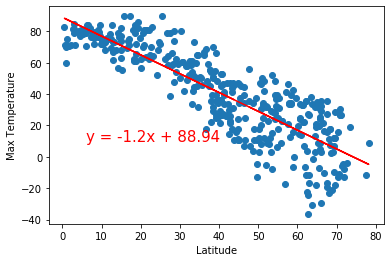

In [13]:
## Convert to floats and store Lat and Max Temp as x and y values
x_values = northern_hemisphere_data['Lat'].astype('float')
y_values = northern_hemisphere_data['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5137572162326478


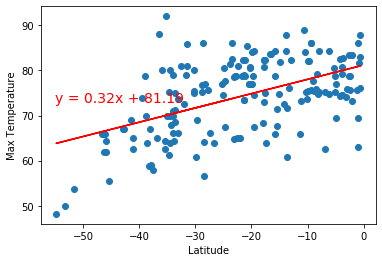

In [14]:
## Convert to floats and store Lat and Max Temp as x and y values
x_values = southern_hemisphere_data['Lat'].astype('float')
y_values = southern_hemisphere_data['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq  = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,73),fontsize=14,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

<b>Analysis: Max Temp vs. Latitude Linear Regression</b>
>Our linear regression graphs are showing a strong relationship between the variables.
The r-squared values – 86% and 51% are pretty strong, especially for the Northern hemisphere, which makes it perfect for this model. The Northern Hemisphere consists most of the earth's land area which after the dataframe splits, gave us a bigger sample set of data for the analysis.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.29337280117360115


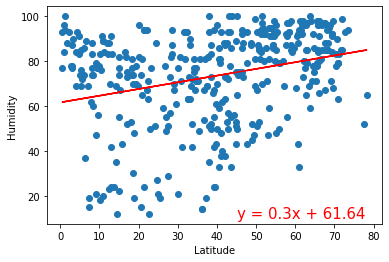

In [15]:
## Convert to floats and store Lat and Max Temp as x and y values
x_values = northern_hemisphere_data['Lat'].astype('float')
y_values = northern_hemisphere_data['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq2,(45,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.4363488683898229


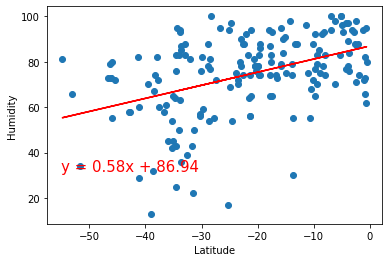

In [16]:
## Convert to floats and store Lat and Max Temp as x and y values
x_values = southern_hemisphere_data['Lat'].astype('float')
y_values = southern_hemisphere_data['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq2,(-55,32),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

<b>Analysis: Humidity vs. Latitude Linear Regression</b>
>The graphs for Humidity vs Latitude also show a good correlation for the two variables.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.31716872067964014


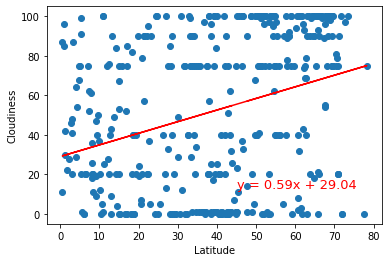

In [17]:
## Convert to floats and store Lat and Max Temp as x and y values
x_values = northern_hemisphere_data['Lat'].astype('float')
y_values = northern_hemisphere_data['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq2,(45,13),fontsize=13,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2775402469642105


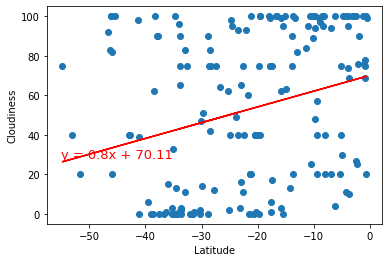

In [18]:
## Convert to floats and store Lat and Max Temp as x and y values
x_values = southern_hemisphere_data['Lat'].astype('float')
y_values = southern_hemisphere_data['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq2,(-55,28),fontsize=13,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

<b>Analysis: Cloudiness vs. Latitude Linear Regression</b>
>Aside from the plots being scattered and not showing us a good pattern to suggests correlation, the variables – cloudiness and latitude also return low square r-squared values for both Northern and Southern hemispheres. This suggests that the two are not the best fit for a Linear Regression Analysis.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10209301061688575


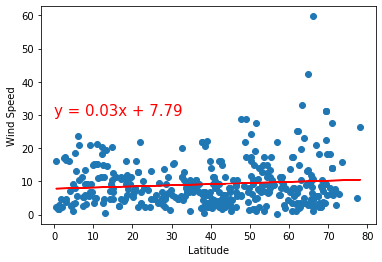

In [19]:
## Convert to floats and store Lat and Max Temp as x and y values
x_values = northern_hemisphere_data['Lat'].astype('float')
y_values = northern_hemisphere_data['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq2,(0,30),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.36132739128987235


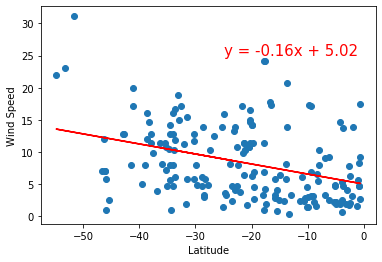

In [20]:
## Convert to floats and store Lat and Max Temp as x and y values
x_values = southern_hemisphere_data['Lat'].astype('float')
y_values = southern_hemisphere_data['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq2,(-25,25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

<b>Analysis: Cloudiness vs. Latitude Linear Regression</b>
>I am giving the same analysis for wind speed and latitude. Based on the plots, these two variables are not the best fit for a linear regression analysis.